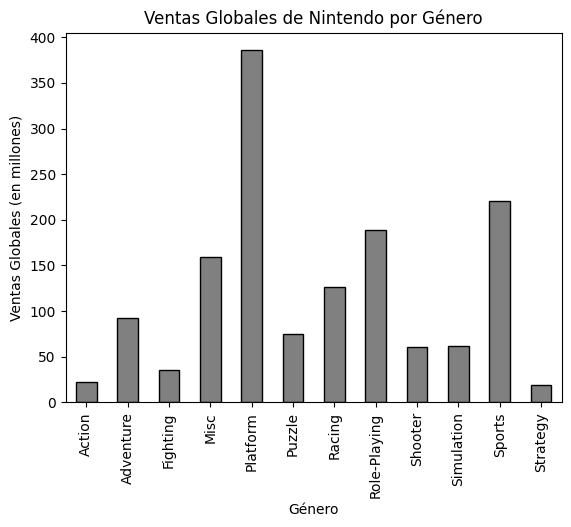

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('../data/Video-Games-Sales-Editado.csv')
df_nintendo=df[df['Publisher'] =='Nintendo']

suma_por_genero = df_nintendo.groupby('Genre')['Global'].sum()
suma_por_genero.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Ventas Globales de Nintendo por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

El género predominante es Plataforma. 

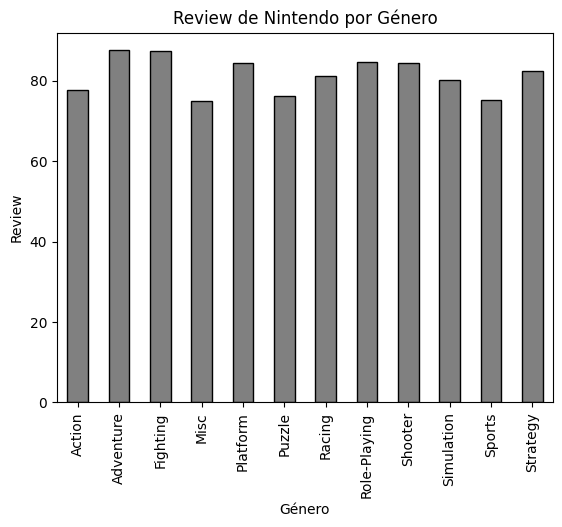

In [37]:
promedio_reviev_por_genero = df_nintendo.groupby('Genre')['Review'].mean()
promedio_reviev_por_genero.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Review de Nintendo por Género')
plt.xlabel('Género')
plt.ylabel('Review')
plt.show()

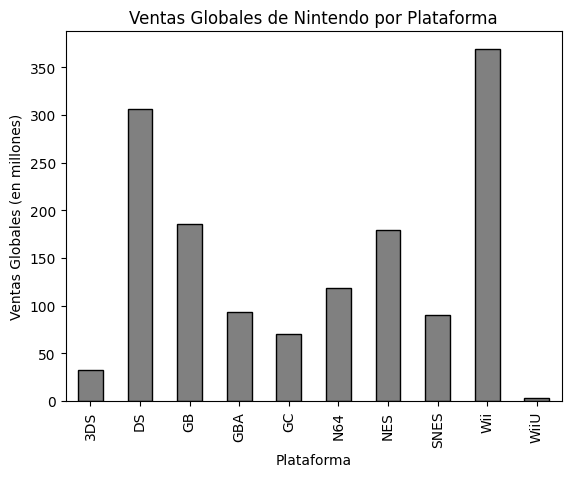

In [23]:
suma_por_plataforma = df_nintendo.groupby('Platform')['Global'].sum()
suma_por_plataforma.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Ventas Globales de Nintendo por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

Predominancia de las consolas Wii y Ds.

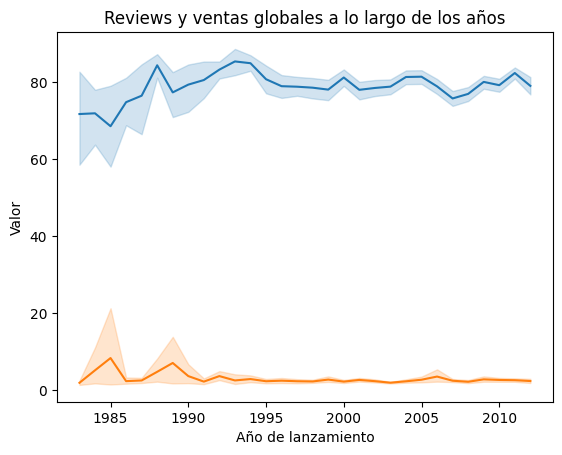

In [46]:
import seaborn as sns


sns.lineplot(x="Year", y='Review', data=df)
sns.lineplot(x="Year", y='Global', data=df )

plt.xlabel('Año de lanzamiento')
plt.ylabel('Valor')
plt.title('Reviews y ventas globales a lo largo de los años')
plt.show()

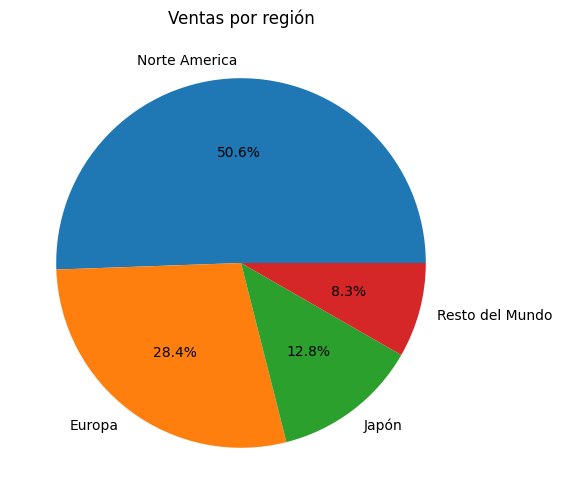

In [57]:
regiones=["North America","Europe","Japan","Rest of World"]
ventas_totales = df[regiones].sum()

plt.figure(figsize=(6, 6))
plt.pie(ventas_totales, labels=['Norte America','Europa','Japón','Resto del Mundo'], autopct='%1.1f%%')
plt.title('Ventas por región')
plt.show()

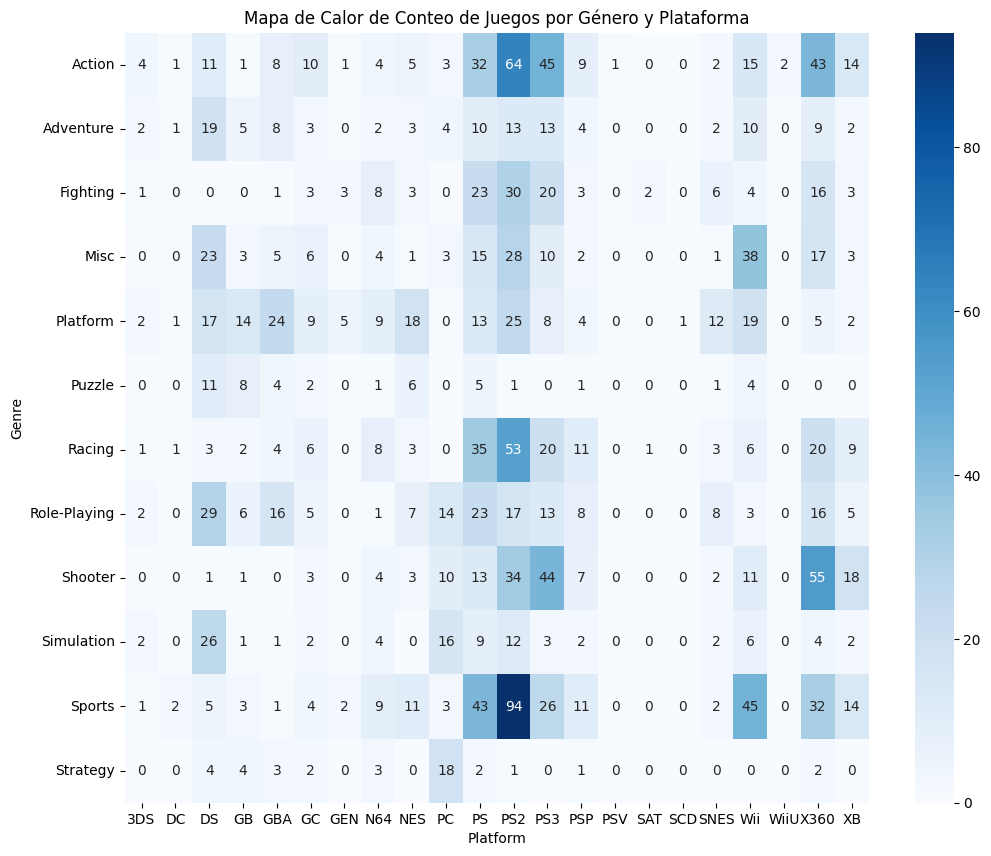

In [86]:
contador_plataforma_genero = df.groupby(['Genre', 'Platform']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 10))
sns.heatmap(contador_plataforma_genero, annot=True, cmap='Blues', fmt='d')

plt.title('Mapa de Calor de Conteo de Juegos por Género y Plataforma')


plt.show()

Observamos que la plataforma Playstation 2 lidera entre los géneros de Deportes, acción y carreras.

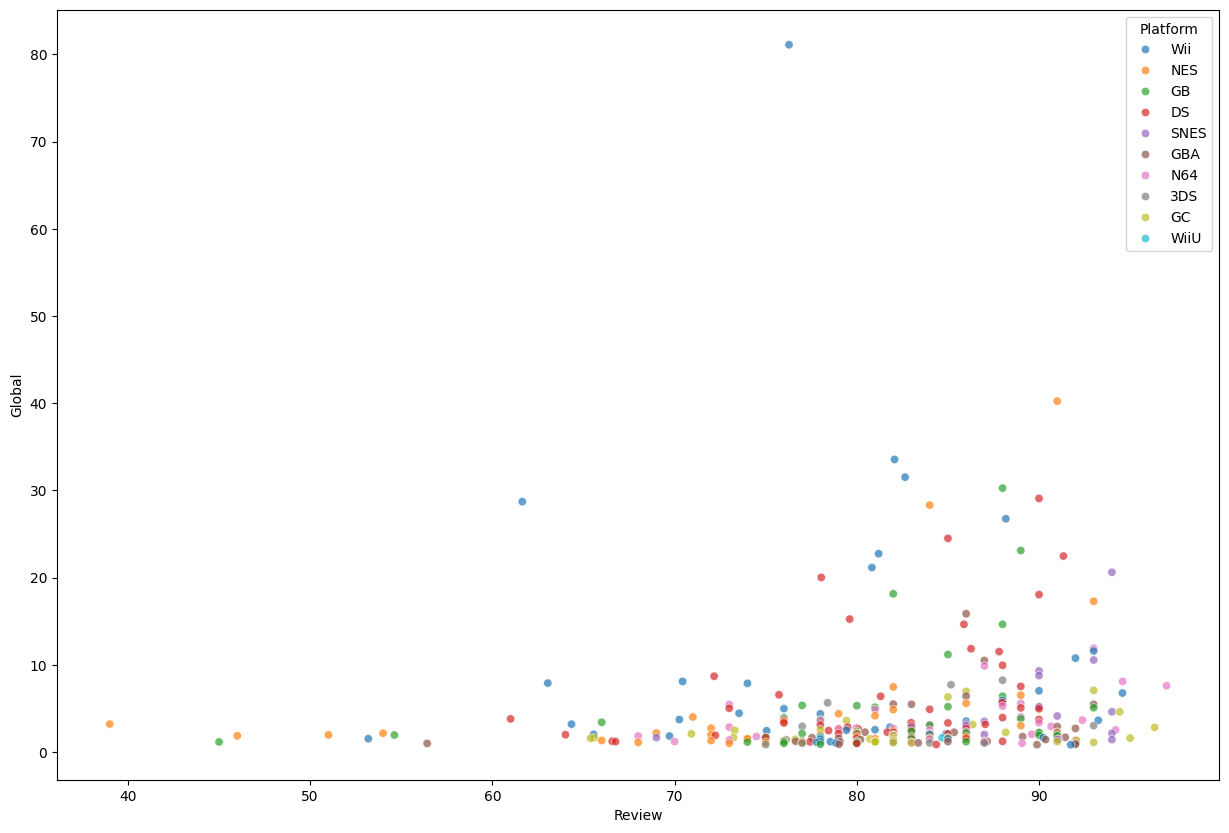

In [96]:
#df_nintendo=df[df['Publisher'] =='Nintendo']
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Review",y="Global",data=df_nintendo,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

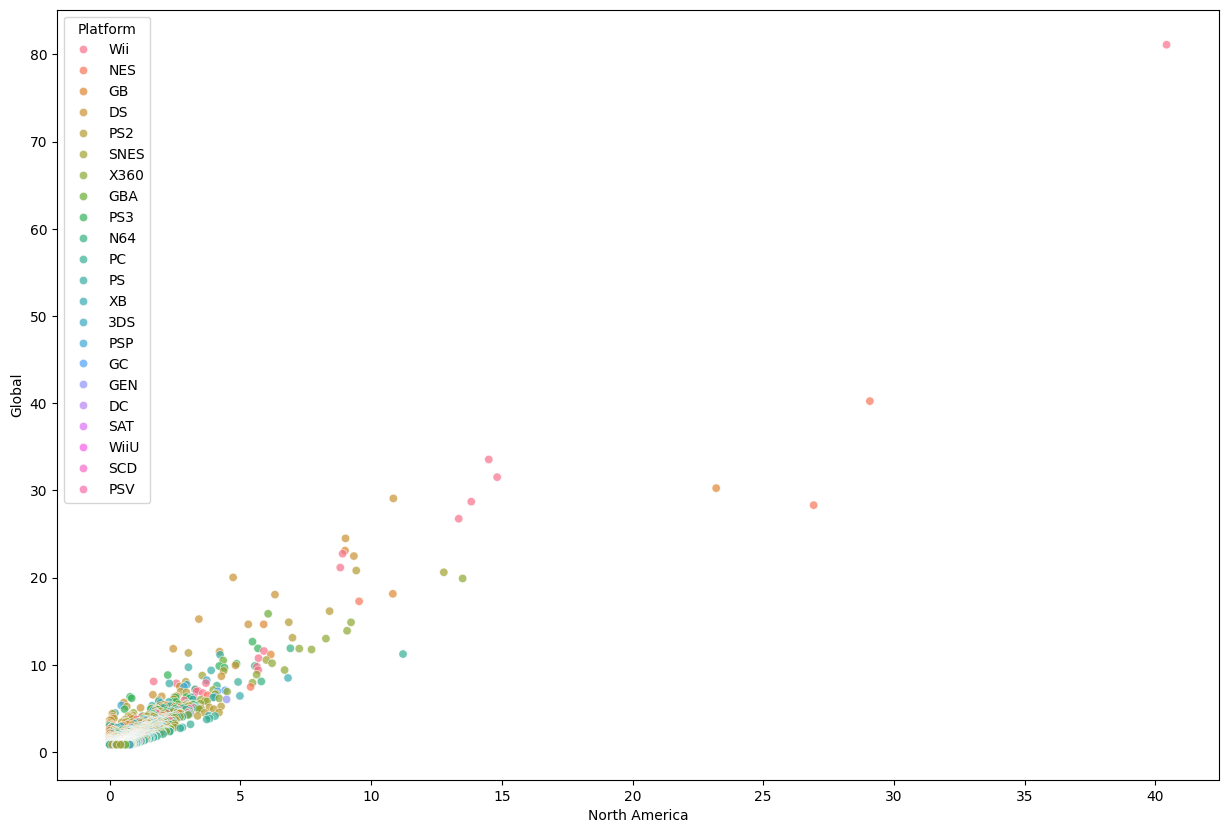

In [107]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="North America",y="Global",data=df,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()


#comparar con las otra regiones!!!!!

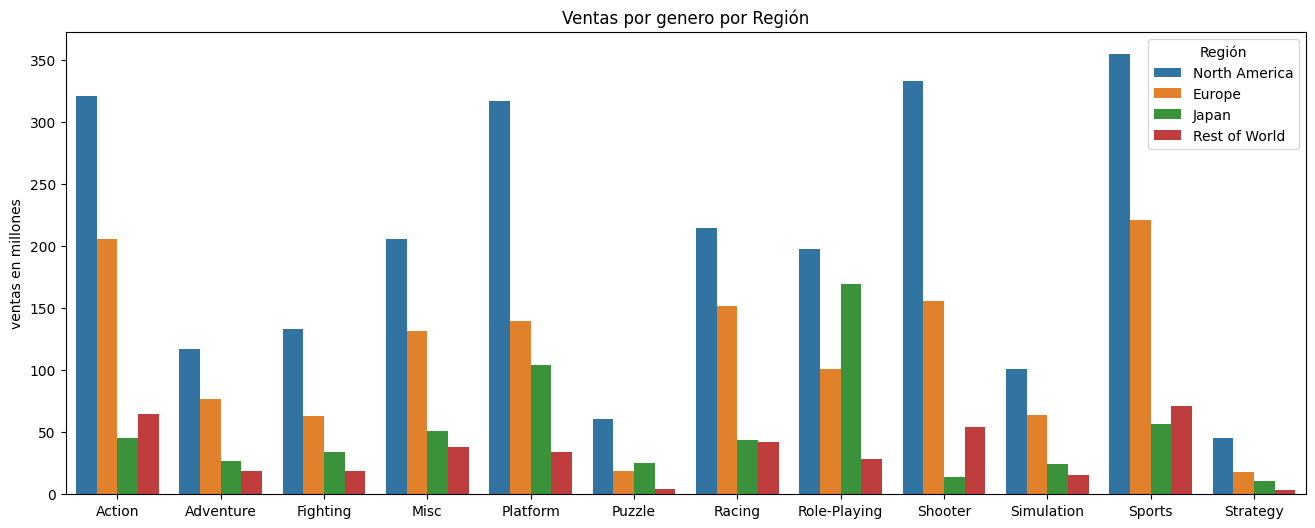

In [145]:
ventas_por_genero = df.groupby(by='Genre').agg({
    'North America':'sum',
    'Europe':'sum',
    'Japan':'sum',
    'Rest of World':'sum'
}).reset_index()

ventas_por_genero = pd.melt(ventas_por_genero, id_vars=['Genre'], value_vars=['North America', 'Europe', 'Japan', 'Rest of World'], 
                        var_name='Región', value_name='Ventas')



plt.figure(figsize=(16,6)) 
sns.barplot(
    x='Genre',
    y='Ventas',
    hue='Región',
    data=ventas_por_genero
)
plt.title('Ventas por genero por Región')
plt.xlabel(None)
plt.ylabel('ventas en millones')
plt.legend(title='Región')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x112a042d0>,
 'caps': [<matplotlib.lines.Line2D at 0x112a05b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1129fb5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x112a07210>],
 'fliers': [<matplotlib.lines.Line2D at 0x112a07d90>],
 'means': []}

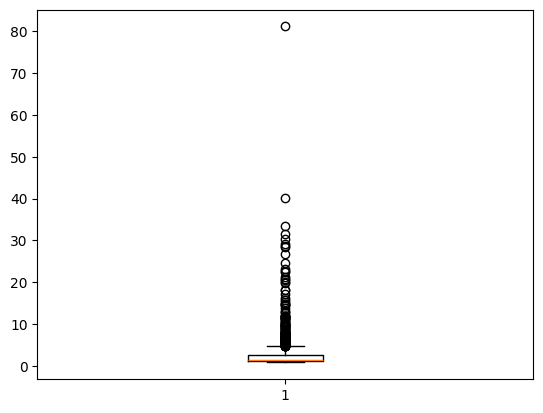

In [3]:
plt.boxplot(df['Global'])


In [23]:
def total_outliers(val):
    val_df = pd.DataFrame(val)  # Convertir la entrada en un DataFrame
    q1 = val_df.quantile(0.25)  # Calcular el cuartil inferior
    q3 = val_df.quantile(0.75)  # Calcular el cuartil superior
    IQR = q3 - q1  # Calcular el rango intercuartílico (IQR)
    cota_inf = q1 - 1.5 * IQR
    cota_sup = q3 + 1.5 * IQR

    # Detectar los outliers en los datos
    outliers = val_df[(val_df < cota_inf) | (val_df > cota_sup)]
    
    # Contar el total de outliers que hay en los datos
    resultado = outliers.count()
    
    return resultado


print(total_outliers(df['Global']))
print(total_outliers(df['North America']))
print(total_outliers(df['Europe']))
print(total_outliers(df['Japan']))
print(total_outliers(df['Rest of World']))


Global    179
dtype: int64
North America    149
dtype: int64
Europe    153
dtype: int64
Japan    264
dtype: int64
Rest of World    169
dtype: int64


              North America  Europe   Japan  Rest of World
Genre                                                     
Action               320.88  205.91   45.66          64.87
Adventure            116.83   76.88   27.01          18.80
Fighting             133.07   63.49   34.01          18.44
Misc                 205.46  131.48   50.78          38.35
Platform             317.03  139.54  104.17          34.42
Puzzle                60.72   18.58   25.00           4.35
Racing               214.35  151.62   43.79          42.08
Role-Playing         197.54  100.90  169.32          28.53
Shooter              333.40  155.89   14.22          53.84
Simulation           101.13   64.08   24.31          15.53
Sports               354.62  221.09   56.47          71.06
Strategy              45.48   18.17   10.72           3.47
           Genre         Region  Normalized Sales
0         Action  North America          0.133672
1      Adventure  North America          0.048669
2       Fighting  North 

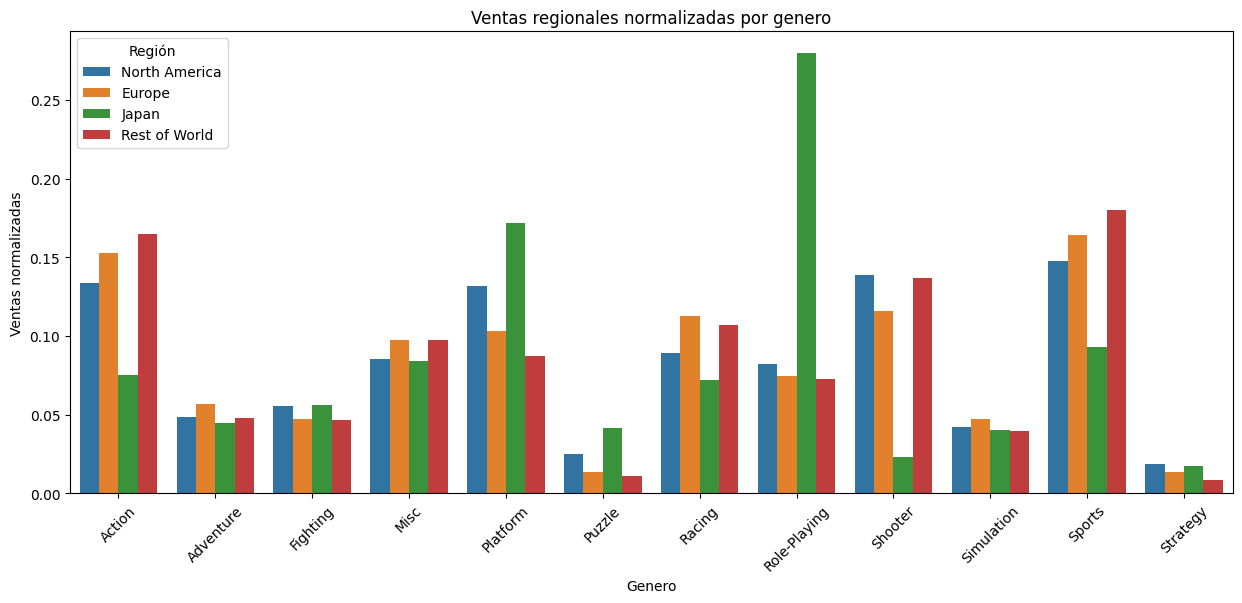

In [33]:
import seaborn as sns
preferencias_regionales_por_genero = df.groupby('Genre').agg({
    'North America': 'sum',
    'Europe': 'sum',
    'Japan': 'sum',
    'Rest of World': 'sum'
})

total_ventas_por_region = preferencias_regionales_por_genero.sum()

preferencia_normalizada_por_genero = preferencias_regionales_por_genero / total_ventas_por_region


print(preferencias_regionales_por_genero)


data_melted = preferencia_normalizada_por_genero.reset_index().melt(id_vars='Genre', var_name='Region', value_name='Normalized Sales')

print(data_melted)


plt.figure(figsize=(15, 6))
sns.barplot(x='Genre', y='Normalized Sales', hue='Region', data=data_melted)
plt.title('Ventas regionales normalizadas por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas normalizadas')
plt.xticks(rotation=45)
plt.legend(title='Región', loc='upper left')
plt.show()

# Analisis del gráfico

- Norte America: Los generos principales son acción, plataforma, disparos y deportes.
- Europa: Los generos principales son acción y deportes. Bastante parecido a Norte America.
- Japon: Predominancia amplia en juegos de rol. Le sigue juegos de plataforma.
- Resto del mundo: Acción, deportes y disparos son lo preferidos.